# Wrange and Analyze Data Project

In [728]:
import requests
import os
import pandas as pd
import json
import numpy as np
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
%matplotlib inline

## Section One: Gather Data

### Get WeRateDogs Twitter archive.

In [407]:
weratedogs_df = pd.read_csv('twitter-archive-enhanced.csv')

In [408]:
weratedogs_df.sample(50)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2133  670073503555706880 NaN                    NaN                    
2282  667211855547486208 NaN                    NaN                    
472   816450570814898180 NaN                    NaN                    
1500  692158366030913536 NaN                    NaN                    
1034  745057283344719872 NaN                    NaN                    
1546  689283819090870273 NaN                    NaN                    
1323  706265994973601792 NaN                    NaN                    
592   798933969379225600 NaN                    NaN                    
2235  668171859951755264 NaN                    NaN                    
1298  707741517457260545 NaN                    NaN                    
1282  708738143638450176 NaN                    NaN                    
1571  687704180304273409 NaN                    NaN                    
1804  676946864479084545 NaN                    NaN                    
1759  678740035362037760 NaN                    NaN                    
916   756998049151549440 NaN                    NaN                    
742   780476555013349377 NaN                    NaN                    
610   797236660651966464 NaN                    NaN                    
1218  714957620017307648 NaN                    NaN                    
2030  671789708968640512 NaN                    NaN                    
258   843604394117681152 NaN                    NaN                    
75    878281511006478336 NaN                    NaN                    
1262  710140971284037632 NaN                    NaN                    
267   841680585030541313 NaN                    NaN                    
1762  678643457146150913 NaN                    NaN                    
40    884562892145688576 NaN                    NaN                    
1884  674800520222154752 NaN                    NaN                    
1417  698549713696649216 NaN                    NaN                    
1001  747933425676525569 NaN                    NaN                    
786   774757898236878852 NaN                    NaN                    
648   793120401413079041 NaN                    NaN                    
1599  686034024800862208 NaN                    NaN                    
1385  700747788515020802 NaN                    NaN                    
1480  693486665285931008 NaN                    NaN                    
2323  666428276349472768 NaN                    NaN                    
1610  685532292383666176 NaN                    NaN                    
563   802572683846291456 NaN                    NaN                    
413   822872901745569793 NaN                    NaN                    
1410  699036661657767936 NaN                    NaN                    
1051  742534281772302336 NaN                    NaN                    
2300  667062181243039745 NaN                    NaN                    
1580  687127927494963200 NaN                    NaN                    
1769  678380236862578688 NaN                    NaN                    
302   836648853927522308 NaN                    NaN                    
1593  686386521809772549 NaN                    NaN                    
1373  701981390485725185 NaN                    NaN                    
853   765371061932261376 NaN                    NaN                    
493   813202720496779264 NaN                    NaN                    
1864  675362609739206656 NaN                    NaN                    
1486  693109034023534592 NaN                    NaN                    
1522  690649993829576704 NaN                    NaN                    

                      timestamp  \
2133  2015-11-27 02:55:47 +0000   
2282  2015-11-19 05:24:37 +0000   
472   2017-01-04 01:05:59 +0000   
1500  2016-01-27 01:33:08 +0000   
1034  2016-06-21 00:54:33 +0000   
1546  2016-01-19 03:10:43 +0000   
1323  2016-03-05 23:51:49 +0000   
592   2016-11-16 17:01:16 +0000   
2235  2015-11-21 20:59:20 +0

### Get Tweet image predictions

In [409]:
folder_name = "image-predictions"

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [410]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open(os.path.join(folder_name,url.split('/')[-1]), mode = "wb") as file:
    file.write(response.content)

In [411]:
image_df = pd.read_csv("image-predictions/image-predictions.tsv", sep='\t')

In [412]:
image_df.sample(50)

tweet_id                                          jpg_url  \
1047  713177543487135744  https://pbs.twimg.com/media/CeW3MWMWQAEOMbq.jpg   
1274  750041628174217216  https://pbs.twimg.com/media/CmfssOtXYAAKa_Z.jpg   
113   667915453470232577  https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg   
1573  795400264262053889  https://pbs.twimg.com/media/CwnUUGTWIAE8sFR.jpg   
143   668620235289837568  https://pbs.twimg.com/media/CUdqjvAWUAANfoU.jpg   
1717  819015331746349057  https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg   
1143  730196704625098752  https://pbs.twimg.com/media/CiIuBwCUgAAAGbz.jpg   
1335  758041019896193024  https://pbs.twimg.com/media/CoUaSKEXYAAYsAl.jpg   
46    666804364988780544  https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg   
1976  870308999962521604  https://pbs.twimg.com/media/DBP1asiUAAEKZI5.jpg   
1840  837820167694528512  https://pbs.twimg.com/media/C6CI_jbVAAA3-a1.jpg   
1948  862831371563274240  https://pbs.twimg.com/media/C_lkieeVwAAm0L4.jpg   
296   671362598324076544  https://pbs.twimg.com/media/CVEouDRXAAEe8mt.jpg   
718   685667379192414208  https://pbs.twimg.com/media/CYP62A6WkAAOnL4.jpg   
1112  724049859469295616  https://pbs.twimg.com/media/CgxXf1TWYAEjY61.jpg   
567   678341075375947776  https://pbs.twimg.com/media/CWnznDTU4AAa-6P.jpg   
330   672095186491711488  https://pbs.twimg.com/media/CVPDAR9XIAAm8QB.jpg   
327   671896809300709376  https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg   
339   672245253877968896  https://pbs.twimg.com/media/CVRLfeoW4AA_ldZ.jpg   
396   673656262056419329  https://pbs.twimg.com/media/CVlOy3pW4AQ9H1K.jpg   
1706  817536400337801217  https://pbs.twimg.com/media/C1h4_MEXUAARxQF.jpg   
1060  715009755312439296  https://pbs.twimg.com/media/Cew5kyOWsAA8Y_o.jpg   
1644  808106460588765185  https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg   
366   672902681409806336  https://pbs.twimg.com/media/CVahaz9XAAA8uTy.jpg   
185   669359674819481600  https://pbs.twimg.com/media/CUoLEG3XAAE65I0.jpg   
1407  770093767776997377  https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg   
1621  803276597545603072  https://pbs.twimg.com/media/CyXPzXRWgAAvd1j.jpg   
159   668892474547511297  https://pbs.twimg.com/media/CUhiJ63WEAAw2qm.jpg   
1278  750101899009982464  https://pbs.twimg.com/media/Cmjlsh1XgAEvhq_.jpg   
2061  889638837579907072  https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
1413  771004394259247104  https://pbs.twimg.com/media/CrMmVqyWcAIDCHI.jpg   
1739  822462944365645825  https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg   
785   690248561355657216  https://pbs.twimg.com/media/CZRBZ9mWkAAWblt.jpg   
1547  792773781206999040  https://pbs.twimg.com/media/CwB_i-zXEAEiP29.jpg   
951   704871453724954624  https://pbs.twimg.com/media/Ccg02LiWEAAJHw1.jpg   
1657  810896069567610880  https://pbs.twimg.com/media/C0DhpcrUAAAnx88.jpg   
128   668274247790391296  https://pbs.twimg.com/media/CUYv4d2WUAAziXs.jpg   
1883  847251039262605312  https://pbs.twimg.com/media/C8IKUjAUwAEP-En.jpg   
1809  832757312314028032  https://pbs.twimg.com/media/C46MWnFVYAUg1RK.jpg   
896   699691744225525762  https://pbs.twimg.com/media/CbXN7aPWIAE0Xt1.jpg   
221   670093938074779648  https://pbs.twimg.com/media/CUym4Y5WsAEiI9_.jpg   
1959  865718153858494464  https://pbs.twimg.com/media/DAOmEZiXYAAcv2S.jpg   
1794  831309418084069378  https://pbs.twimg.com/media/C4lngK5VUAEVrNO.jpg   
41    666701168228331520  https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg   
1459  778027034220126208  https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg   
1374  762699858130116608  https://pbs.twimg.com/media/CpWnecZWIAAUFwt.jpg   
1103  721503162398597120  https://pbs.twimg.com/media/CgNLS1PW8AAxWSN.jpg   
1879  846514051647705089  https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg   
1873  845306882940190720  https://pbs.twimg.com/media/C7siH5DXkAACnDT.jpg   
844   695074328191332352  https://pbs.twimg.com/media/CaVmajOWYAA1uNG.jpg   

      img_num                           p1   p1_conf  p1_dog  \
1047  1        whippet  

### Query the Twitter API

Read tweet_json.txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [413]:
api_data = []
tweet_file = open('tweet-json.txt', "r")

for line in tweet_file:
    tweet = json.loads(line)
    
    api_data.append({'id': tweet['id'],
                        'retweet_count': tweet['retweet_count'],
                        'favorite_count': tweet['favorite_count']})

In [414]:
# check script above
api_data

[{'id': 892420643555336193, 'retweet_count': 8853, 'favorite_count': 39467},
 {'id': 892177421306343426, 'retweet_count': 6514, 'favorite_count': 33819},
 {'id': 891815181378084864, 'retweet_count': 4328, 'favorite_count': 25461},
 {'id': 891689557279858688, 'retweet_count': 8964, 'favorite_count': 42908},
 {'id': 891327558926688256, 'retweet_count': 9774, 'favorite_count': 41048},
 {'id': 891087950875897856, 'retweet_count': 3261, 'favorite_count': 20562},
 {'id': 890971913173991426, 'retweet_count': 2158, 'favorite_count': 12041},
 {'id': 890729181411237888, 'retweet_count': 16716, 'favorite_count': 56848},
 {'id': 890609185150312448, 'retweet_count': 4429, 'favorite_count': 28226},
 {'id': 890240255349198849, 'retweet_count': 7711, 'favorite_count': 32467},
 {'id': 890006608113172480, 'retweet_count': 7624, 'favorite_count': 31166},
 {'id': 889880896479866881, 'retweet_count': 5156, 'favorite_count': 28268},
 {'id': 889665388333682689, 'retweet_count': 8538, 'favorite_count': 38818}

In [415]:
api_df = pd.DataFrame(api_data, columns = ['id','retweet_count','favorite_count'])

In [416]:
api_df.sample(50)

id  retweet_count  favorite_count
228   848212111729840128  3444           17618         
117   869988702071779329  25661          0             
331   832769181346996225  43             0             
356   830173239259324417  6554           0             
2164  669363888236994561  252            669           
1849  675710890956750848  928            2046          
1690  681302363064414209  2072           4347          
922   755206590534418437  6148           18212         
972   750056684286914561  1011           3444          
2249  667806454573760512  535            1111          
1871  675145476954566656  1011           2305          
1795  677269281705472000  790            2164          
845   766078092750233600  2970           0             
610   797165961484890113  32             256           
1675  682059653698686977  1915           5442          
1941  673709992831262724  306            908           
1050  742528092657332225  2245           4878          
1021  746521445350707200  1110           0             
935   753298634498793472  6620           0             
451   818614493328580609  2982           10971         
961   750719632563142656  5747           14621         
1171  720340705894408192  1098           3131          
1550  688916208532455424  983            3003          
1970  673240798075449344  798            1510          
1967  673317986296586240  293            924           
554   803692223237865472  8689           0             
1110  733460102733135873  1451           4605          
1804  676936541936185344  5515           13809         
332   832757312314028032  4127           18423         
1932  674014384960745472  714            1676          
276   840370681858686976  5146           17918         
2285  667177989038297088  58             200           
725   782598640137187329  2184           8694          
742   780459368902959104  1224           5892          
2223  668286279830867968  149            535           
1440  696754882863349760  396            1615          
1771  678255464182861824  418            1726          
1267  709519240576036864  277            1620          
797   772877495989305348  4501           9555          
622   796031486298386433  4284           12071         
225   848690551926992896  4826           27104         
1613  685268753634967552  1371           3419          
158   860981674716409858  2334           0             
1295  707776935007539200  1079           3593          
1085  738156290900254721  748            2768          
2280  667211855547486208  258            516           
993   748346686624440324  1413           5735          
1023  746369468511756288  1854           6637          
2314  666649482315059201  608            923           
277   840268004936019968  6497           20950

## Section Two: Assessing Data

Assess each dataframe visually and programmatically for quality and tidiness issues

### Visually inspect each table

In [417]:
# Display weratedogs table
weratedogs_df

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193 NaN                    NaN                    
1     892177421306343426 NaN                    NaN                    
2     891815181378084864 NaN                    NaN                    
3     891689557279858688 NaN                    NaN                    
4     891327558926688256 NaN                    NaN                    
5     891087950875897856 NaN                    NaN                    
6     890971913173991426 NaN                    NaN                    
7     890729181411237888 NaN                    NaN                    
8     890609185150312448 NaN                    NaN                    
9     890240255349198849 NaN                    NaN                    
10    890006608113172480 NaN                    NaN                    
11    889880896479866881 NaN                    NaN                    
12    889665388333682689 NaN                    NaN                    
13    889638837579907072 NaN                    NaN                    
14    889531135344209921 NaN                    NaN                    
15    889278841981685760 NaN                    NaN                    
16    888917238123831296 NaN                    NaN                    
17    888804989199671297 NaN                    NaN                    
18    888554962724278272 NaN                    NaN                    
19    888202515573088257 NaN                    NaN                    
20    888078434458587136 NaN                    NaN                    
21    887705289381826560 NaN                    NaN                    
22    887517139158093824 NaN                    NaN                    
23    887473957103951883 NaN                    NaN                    
24    887343217045368832 NaN                    NaN                    
25    887101392804085760 NaN                    NaN                    
26    886983233522544640 NaN                    NaN                    
27    886736880519319552 NaN                    NaN                    
28    886680336477933568 NaN                    NaN                    
29    886366144734445568 NaN                    NaN                    
...                  ...  ..                     ..                    
2326  666411507551481857 NaN                    NaN                    
2327  666407126856765440 NaN                    NaN                    
2328  666396247373291520 NaN                    NaN                    
2329  666373753744588802 NaN                    NaN                    
2330  666362758909284353 NaN                    NaN                    
2331  666353288456101888 NaN                    NaN                    
2332  666345417576210432 NaN                    NaN                    
2333  666337882303524864 NaN                    NaN                    
2334  666293911632134144 NaN                    NaN                    
2335  666287406224695296 NaN                    NaN                    
2336  666273097616637952 NaN                    NaN                    
2337  666268910803644416 NaN                    NaN                    
2338  666104133288665088 NaN                    NaN                    
2339  666102155909144576 NaN                    NaN                    
2340  666099513787052032 NaN                    NaN                    
2341  666094000022159362 NaN                    NaN                    
2342  666082916733198337 NaN                    NaN                    
2343  666073100786774016 NaN                    NaN                    
2344  666071193221509120 NaN                    NaN                    
2345  666063827256086533 NaN                    NaN                    
2346  666058600524156928 NaN                    NaN                    
2347  666057090499244032 NaN                    NaN                    
2348  666055525042405380 NaN                    NaN                    
2349  666051853826850816 NaN                    NaN     

In [418]:
image_df

tweet_id  \
0     666020888022790149   
1     666029285002620928   
2     666033412701032449   
3     666044226329800704   
4     666049248165822465   
5     666050758794694657   
6     666051853826850816   
7     666055525042405380   
8     666057090499244032   
9     666058600524156928   
10    666063827256086533   
11    666071193221509120   
12    666073100786774016   
13    666082916733198337   
14    666094000022159362   
15    666099513787052032   
16    666102155909144576   
17    666104133288665088   
18    666268910803644416   
19    666273097616637952   
20    666287406224695296   
21    666293911632134144   
22    666337882303524864   
23    666345417576210432   
24    666353288456101888   
25    666362758909284353   
26    666373753744588802   
27    666396247373291520   
28    666407126856765440   
29    666411507551481857   
...                  ...   
2045  886366144734445568   
2046  886680336477933568   
2047  886736880519319552   
2048  886983233522544640   
2049  887101392804085760   
2050  887343217045368832   
2051  887473957103951883   
2052  887517139158093824   
2053  887705289381826560   
2054  888078434458587136   
2055  888202515573088257   
2056  888554962724278272   
2057  888804989199671297   
2058  888917238123831296   
2059  889278841981685760   
2060  889531135344209921   
2061  889638837579907072   
2062  889665388333682689   
2063  889880896479866881   
2064  890006608113172480   
2065  890240255349198849   
2066  890609185150312448   
2067  890729181411237888   
2068  890971913173991426   
2069  891087950875897856   
2070  891327558926688256   
2071  891689557279858688   
2072  891815181378084864   
2073  892177421306343426   
2074  892420643555336193   

                                                                                      jpg_url  \
0     https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg                                           
1     https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg                                           
2     https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg                                           
3     https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg                                           
4     https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg                                           
5     https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg                                           
6     https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg                                           
7     https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg                                           
8     https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg                                           
9     https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg                                           
10    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg                                           
11    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg                                           
12    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg                                           
13    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg                                           
14    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg                                           
15    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg                                           
16    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg                                           
17    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg                                           
18    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg                                           
19    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg                                           
20    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg                                           
21    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg                                           
22    https://pbs.twimg.com/media/CT9OwFIWEAMuRj

In [419]:
api_df

id  retweet_count  favorite_count
0     892420643555336193  8853           39467         
1     892177421306343426  6514           33819         
2     891815181378084864  4328           25461         
3     891689557279858688  8964           42908         
4     891327558926688256  9774           41048         
5     891087950875897856  3261           20562         
6     890971913173991426  2158           12041         
7     890729181411237888  16716          56848         
8     890609185150312448  4429           28226         
9     890240255349198849  7711           32467         
10    890006608113172480  7624           31166         
11    889880896479866881  5156           28268         
12    889665388333682689  8538           38818         
13    889638837579907072  4735           27672         
14    889531135344209921  2321           15359         
15    889278841981685760  5637           25652         
16    888917238123831296  4709           29611         
17    888804989199671297  4559           26080         
18    888554962724278272  3732           20290         
19    888078434458587136  3653           22201         
20    887705289381826560  5609           30779         
21    887517139158093824  12082          46959         
22    887473957103951883  18781          69871         
23    887343217045368832  10737          34222         
24    887101392804085760  6167           31061         
25    886983233522544640  8084           35859         
26    886736880519319552  3443           12306         
27    886680336477933568  4610           22798         
28    886366144734445568  3316           21524         
29    886267009285017600  4              117           
...                  ... ..              ...           
2324  666411507551481857  339            459           
2325  666407126856765440  44             113           
2326  666396247373291520  92             172           
2327  666373753744588802  100            194           
2328  666362758909284353  595            804           
2329  666353288456101888  77             229           
2330  666345417576210432  146            307           
2331  666337882303524864  96             204           
2332  666293911632134144  368            522           
2333  666287406224695296  71             152           
2334  666273097616637952  82             184           
2335  666268910803644416  37             108           
2336  666104133288665088  6871           14765         
2337  666102155909144576  16             81            
2338  666099513787052032  73             164           
2339  666094000022159362  79             169           
2340  666082916733198337  47             121           
2341  666073100786774016  174            335           
2342  666071193221509120  67             154           
2343  666063827256086533  232            496           
2344  666058600524156928  61             115           
2345  666057090499244032  146            304           
2346  666055525042405380  261            448           
2347  666051853826850816  879            1253          
2348  666050758794694657  60             136           
2349  666049248165822465  41             111           
2350  666044226329800704  147            311           
2351  666033412701032449  47             128           
2352  666029285002620928  48             132           
2353  666020888022790149  532            2535          

[2354 rows x 3 columns]

### Programmatically Assess Each Table

In [420]:
# Find number of rows for each table
print("Number of rows in weratedogs_df:", weratedogs_df.shape[0]);
print("Number of rows in image_df:", image_df.shape[0]);
print("Number of rows in api_df:", api_df.shape[0]);

Number of rows in weratedogs_df: 2356
Number of rows in image_df: 2075
Number of rows in api_df: 2354


#### WeRateDogs

In [421]:
weratedogs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [422]:
# Check any missing values
weratedogs_df.isnull().any()

tweet_id                      False
in_reply_to_status_id         True 
in_reply_to_user_id           True 
timestamp                     False
source                        False
text                          False
retweeted_status_id           True 
retweeted_status_user_id      True 
retweeted_status_timestamp    True 
expanded_urls                 True 
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

In [423]:
# Check if all tweet IDs are unique
weratedogs_df.tweet_id.nunique() == len(weratedogs_df.tweet_id)

True

In [424]:
# Check dog names, we see some strange names here ("a", "an")
weratedogs_df.name.value_counts()[:30]

None       745
a          55 
Charlie    12 
Oliver     11 
Lucy       11 
Cooper     11 
Penny      10 
Tucker     10 
Lola       10 
Winston    9  
Bo         9  
the        8  
Sadie      8  
Buddy      7  
an         7  
Bailey     7  
Daisy      7  
Toby       7  
Leo        6  
Koda       6  
Stanley    6  
Milo       6  
Bella      6  
Jax        6  
Rusty      6  
Jack       6  
Oscar      6  
Scout      6  
Dave       6  
Gus        5  
Name: name, dtype: int64

In [425]:
# Check rating scores - numerator
weratedogs_df.rating_numerator.sort_values(ascending=False)

979     1776
313     960 
189     666 
188     420 
2074    420 
1120    204 
290     182 
902     165 
1779    144 
1634    143 
1635    121 
1228    99  
1843    88  
433     84  
1254    80  
695     75  
340     75  
1351    60  
1202    50  
1274    45  
1433    44  
763     27  
1712    26  
516     24  
1663    20  
55      17  
285     15  
291     15  
83      14  
866     14  
        ..  
2183    3   
1314    3   
1928    3   
765     3   
2202    3   
1692    3   
1478    3   
1898    3   
1249    3   
2305    3   
2079    2   
2326    2   
2349    2   
2237    2   
2246    2   
1920    2   
1761    2   
2310    2   
1764    2   
1940    1   
2038    1   
2091    1   
1869    1   
1446    1   
605     1   
2338    1   
2261    1   
2335    1   
1016    0   
315     0   
Name: rating_numerator, Length: 2356, dtype: int64

In [426]:
# Check outlier numbers
print(weratedogs_df.iloc[979])
print()
print(weratedogs_df.iloc[313])
print()
print(weratedogs_df.iloc[189])

tweet_id                      749981277374128128                                                                 
in_reply_to_status_id         NaN                                                                                
in_reply_to_user_id           NaN                                                                                
timestamp                     2016-07-04 15:00:45 +0000                                                          
source                        <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>
text                          This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh     
retweeted_status_id           NaN                                                                                
retweeted_status_user_id      NaN                                                                                
retweeted_status_timestamp    NaN                                                       

In [427]:
# Check rating scores - denominator
weratedogs_df.rating_denominator.sort_values(ascending=False)

1120    170
902     150
1634    130
1779    120
1635    110
1228    90 
1254    80 
1843    80 
433     70 
1274    50 
1351    50 
1202    50 
1433    40 
1598    20 
1165    20 
1663    16 
342     15 
1662    11 
1068    11 
784     11 
800     10 
778     10 
777     10 
776     10 
779     10 
780     10 
799     10 
775     10 
781     10 
782     10 
        .. 
1556    10 
1555    10 
1554    10 
1553    10 
1552    10 
1551    10 
1550    10 
1549    10 
1548    10 
1547    10 
1562    10 
0       10 
1571    10 
1577    10 
1564    10 
1565    10 
1566    10 
1567    10 
1568    10 
1569    10 
1570    10 
1563    10 
1572    10 
1573    10 
1574    10 
1575    10 
1576    10 
516     7  
2335    2  
313     0  
Name: rating_denominator, Length: 2356, dtype: int64

In [428]:
# Check denominator values that are not 10
rating_check = weratedogs_df.rating_denominator != 10
df[rating_check].rating_denominator.sort_values(ascending=False)

1120    170
902     150
1634    130
1779    120
1635    110
1228    90 
1254    80 
1843    80 
433     70 
1351    50 
1202    50 
1274    50 
1433    40 
1598    20 
1165    20 
1663    16 
342     15 
1662    11 
1068    11 
784     11 
516     7  
2335    2  
313     0  
Name: rating_denominator, dtype: int64

In [429]:
# Get number of rows where denominator values that are not 10
rating_check[rating_check].shape[0]

23

In [430]:
# Check missing values in rating scores
weratedogs_df.rating_denominator.isnull().sum()

0

In [431]:
# Check missing values in rating scores
weratedogs_df.rating_numerator.isnull().sum()

0

#### Image Prediction Table

In [432]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [433]:
# Check any missing values
image_df.isnull().any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

In [434]:
# Check for duplicate IDs
image_df[image_df.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

In [435]:
# Check if all jpg_urls are unique
image_df[image_df.jpg_url.duplicated()]

tweet_id  \
1297  752309394570878976   
1315  754874841593970688   
1333  757729163776290825   
1345  759159934323924993   
1349  759566828574212096   
1364  761371037149827077   
1368  761750502866649088   
1387  766078092750233600   
1407  770093767776997377   
1417  771171053431250945   
1427  772615324260794368   
1446  775898661951791106   
1453  776819012571455488   
1456  777641927919427584   
1463  778396591732486144   
1476  780496263422808064   
1487  782021823840026624   
1495  783347506784731136   
1510  786036967502913536   
1522  788070120937619456   
1538  790723298204217344   
1541  791026214425268224   
1564  793614319594401792   
1569  794355576146903043   
1571  794983741416415232   
1579  796177847564038144   
1588  798340744599797760   
1589  798628517273620480   
1590  798644042770751489   
1591  798665375516884993   
...                  ...   
1619  802624713319034886   
1624  803692223237865472   
1627  804413760345620481   
1634  805958939288408065   
1636  806242860592926720   
1640  807059379405148160   
1645  808134635716833280   
1652  809808892968534016   
1683  813944609378369540   
1693  816014286006976512   
1699  816829038950027264   
1703  817181837579653120   
1712  818588835076603904   
1717  819015331746349057   
1718  819015337530290176   
1727  820446719150292993   
1736  821813639212650496   
1742  822647212903690241   
1746  823269594223824897   
1755  824796380199809024   
1789  829878982036299777   
1803  832040443403784192   
1804  832215726631055365   
1858  841833993020538882   
1864  842892208864923648   
1903  851953902622658560   
1944  861769973181624320   
1992  873697596434513921   
2041  885311592912609280   
2055  888202515573088257   

                                                                                      jpg_url  \
1297  https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg   
1315  https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg                                           
1333  https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg                                           
1345  https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                           
1349  https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg                                           
1364  https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg                               
1368  https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg                                           
1387  https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg                                           
1407  https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg                                           
1417  https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                                           
1427  https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg                                           
1446  https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg                                           
1453  https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg                                           
1456  https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg                                           
1463  https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg                                           
1476  https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg                                           
1487  https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                           
1495  https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg                                           
1510  https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg                                           
1522  https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                                           
1538  https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                                           
1541  https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg                                           
1564  https://pbs.twimg.com/media/CvyVxQRWEAAdSZ

In [436]:
# Look at duplicate pairs
image_df[image_df.jpg_url.duplicated(keep = False)].sort_values(
    by = 'jpg_url').head(20)

tweet_id  \
480   675354435921575936   
1297  752309394570878976   
1864  842892208864923648   
1641  807106840509214720   
1703  817181837579653120   
1691  815966073409433600   
1705  817423860136083457   
1858  841833993020538882   
1715  819004803107983360   
1718  819015337530290176   
1716  819006400881917954   
1717  819015331746349057   
1746  823269594223824897   
1738  822244816520155136   
1740  822489057087389700   
1742  822647212903690241   
1767  826958653328592898   
1789  829878982036299777   
1785  829374341691346946   
1903  851953902622658560   

                                                                                      jpg_url  \
480   https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg   
1297  https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg   
1864  https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg   
1641  https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg   
1703  https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg   
1691  https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg   
1705  https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg   
1858  https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg   
1715  https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                           
1718  https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                           
1716  https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg                                           
1717  https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg                                           
1746  https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg                                           
1738  https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg                                           
1740  https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg                                           
1742  https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg                                           
1767  https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg                                           
1789  https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg                                           
1785  https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg                                           
1903  https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg                                           

      img_num                         p1   p1_conf  p1_dog  \
480   1        upright                    0.303415  False    
1297  1        upright                    0.303415  False    
1864  1        Chihuahua                  0.505370  True     
1641  1        Chihuahua                  0.505370  True     
1703  1        Tibetan_mastiff            0.506312  True     
1691  1        Tibetan_mastiff            0.506312  True     
1705  1        ice_bear                   0.336200  False    
1858  1        ice_bear                   0.336200  False    
1715  1        standard_poodle            0.351308  True     
1718  1        standard_poodle            0.351308  True     
1716  4        prison                     0.907083  False    
1717  4        prison                     0.907083  False    
1746  1        Samoyed                    0.585441  True     
1738  1        Samoyed                    0.585441  True     
1740  1        Samoyed                    0.416769  True     
1742  1        Samoyed                    0.416769  True     
1767  1        golden_retriever           0.617389  True     
1789  1        golden_retriever           0.617389  True     
1785  1        Staffordshire_bullterrier  0.757547  True     
1903  1        Staffordshire_bullterrier  0.757547  True     

                                  p2   p2_conf  p2_dog  \
480   golden_retriever      

In [437]:
# Find jpg_url that doesn't return a jpg file
url_check = image_df[~image_df.jpg_url.str.endswith('.jpg')]

In [438]:
url_check

tweet_id  \
320  671789708968640512   
815  692752401762250755   

                                                         jpg_url  img_num  \
320  https://pbs.twimg.com/tweet_video_thumb/CVKtH-4WIAAmiQ5.png  1         
815  https://pbs.twimg.com/tweet_video_thumb/CZ0mhduWkAICSGe.png  1         

            p1   p1_conf  p1_dog              p2   p2_conf  p2_dog  \
320  dalmatian  0.114259  True    teddy           0.062275  False    
815  Samoyed    0.471276  True    Siberian_husky  0.158850  True     

                   p3   p3_conf  p3_dog  
320  steam_locomotive  0.049700  False   
815  Eskimo_dog        0.138672  True

#### Twitter API Data

In [439]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [440]:
# Check null values
api_df.isnull().any()

id                False
retweet_count     False
favorite_count    False
dtype: bool

In [441]:
# Check duplicate values
api_df[api_df.id.duplicated()]

Empty DataFrame
Columns: [id, retweet_count, favorite_count]
Index: []

## Section Three: Cleaning Data

Create copies of files

In [681]:
weratedogs_clean = weratedogs_df.copy()

In [682]:
image_clean = image_df.copy()

In [683]:
api_clean = api_df.copy()

### Quality Issues - Define, Code, Test

#### Define #1
In weratedogs_df, the “dogs” column has 55 counts of “a” , 7 counts of “an” and 8 counts of “the”.  These seem like data entry errors.  These should be changed to “None”, or better yet as a NaN.

#### Code

In [684]:
# stopwords from NLTK's list of english stopwords (https://gist.github.com/sebleier/554280)
stopwords = ['i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself','yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself','they','them','their','theirs','themselves','what','which','who','whom','this','that','these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just','don','should','now']

In [685]:
# convert stopwords to "None"
weratedogs_clean.name.replace(stopwords, "None", inplace=True)

In [686]:
# furthermore, just make all "None" to NaN
weratedogs_clean.name.replace("None", np.nan, inplace=True)

#### Test

In [687]:
# Check if stopwords have been converted to NaN
weratedogs_clean.name.value_counts()[:20]

Charlie    12
Oliver     11
Cooper     11
Lucy       11
Penny      10
Tucker     10
Lola       10
Winston    9 
Bo         9 
Sadie      8 
Buddy      7 
Daisy      7 
Bailey     7 
Toby       7 
Koda       6 
Leo        6 
Stanley    6 
Rusty      6 
Milo       6 
Bella      6 
Name: name, dtype: int64

In [688]:
# Check null values
weratedogs_clean[weratedogs_clean.name.isna()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
5     891087950875897856 NaN                    NaN                    
7     890729181411237888 NaN                    NaN                    
12    889665388333682689 NaN                    NaN                    
22    887517139158093824 NaN                    NaN                    
24    887343217045368832 NaN                    NaN                    
25    887101392804085760 NaN                    NaN                    
30    886267009285017600  8.862664e+17           2.281182e+09          
32    886054160059072513 NaN                    NaN                    
35    885518971528720385 NaN                    NaN                    
37    885167619883638784 NaN                    NaN                    
41    884441805382717440 NaN                    NaN                    
42    884247878851493888 NaN                    NaN                    
47    883117836046086144 NaN                    NaN                    
55    881633300179243008  8.816070e+17           4.738443e+07          
56    881536004380872706 NaN                    NaN                    
59    880872448815771648 NaN                    NaN                    
62    880095782870896641 NaN                    NaN                    
64    879674319642796034  8.795538e+17           3.105441e+09          
72    878604707211726852 NaN                    NaN                    
78    877611172832227328 NaN                    NaN                    
83    876537666061221889 NaN                    NaN                    
88    875097192612077568 NaN                    NaN                    
89    875021211251597312 NaN                    NaN                    
93    874057562936811520 NaN                    NaN                    
96    873580283840344065 NaN                    NaN                    
99    872967104147763200 NaN                    NaN                    
100   872820683541237760 NaN                    NaN                    
101   872668790621863937 NaN                    NaN                    
103   872486979161796608 NaN                    NaN                    
110   871102520638267392 NaN                    NaN                    
...                  ...  ..                     ..                    
2324  666421158376562688 NaN                    NaN                    
2327  666407126856765440 NaN                    NaN                    
2328  666396247373291520 NaN                    NaN                    
2329  666373753744588802 NaN                    NaN                    
2330  666362758909284353 NaN                    NaN                    
2331  666353288456101888 NaN                    NaN                    
2332  666345417576210432 NaN                    NaN                    
2333  666337882303524864 NaN                    NaN                    
2334  666293911632134144 NaN                    NaN                    
2335  666287406224695296 NaN                    NaN                    
2336  666273097616637952 NaN                    NaN                    
2337  666268910803644416 NaN                    NaN                    
2338  666104133288665088 NaN                    NaN                    
2339  666102155909144576 NaN                    NaN                    
2340  666099513787052032 NaN                    NaN                    
2341  666094000022159362 NaN                    NaN                    
2342  666082916733198337 NaN                    NaN                    
2343  666073100786774016 NaN                    NaN                    
2344  666071193221509120 NaN                    NaN                    
2345  666063827256086533 NaN                    NaN                    
2346  666058600524156928 NaN                    NaN                    
2347  666057090499244032 NaN                    NaN                    
2348  666055525042405380 NaN                    NaN                    
2349  666051853826850816 NaN                    NaN     

#### Define #2
In weratedogs_df, columns “in_reply_to_status_id”, “in_reply_to_user_id”, “retweeted_status_id” and “retweeted_status_user_id” are unnecessary as project detail states retweets are not considered for the project.

#### Code

In [689]:
drop_columns = ["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"]
weratedogs_clean = weratedogs_clean.drop(drop_columns, axis=1)

#### Test

In [690]:
weratedogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1524 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


#### Define #3
In weratedogs_df, the “timestamp” column is a string object.  It’s probably a good idea to turn this into a timestamp.

#### Code

In [691]:
# Check how the column is formatted. Looks like it's YYYY-MM-DD HH:MM:SS +0000
weratedogs_clean.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-21 01:02:36 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-0

In [692]:
weratedogs_clean.timestamp = pd.to_datetime(weratedogs_clean.timestamp)

#### Test

In [693]:
# Check dtype
weratedogs_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

#### Define #4
In weratedogs_df, the “rating_denominator” column has 23 entries where it does not equal 10.  In the project details, it states “These ratings almost always have a denominator of 10”, so other values would be incorrect in this column.

#### Code

In [694]:
# Find entries where denominator is not 10
denominator_check = weratedogs_clean[weratedogs_clean.rating_denominator != 10]
denominator_check

tweet_id           timestamp  \
313   835246439529840640 2017-02-24 21:54:03   
342   832088576586297345 2017-02-16 04:45:50   
433   820690176645140481 2017-01-15 17:52:40   
516   810984652412424192 2016-12-19 23:06:23   
784   775096608509886464 2016-09-11 22:20:06   
902   758467244762497024 2016-07-28 01:00:57   
1068  740373189193256964 2016-06-08 02:41:38   
1120  731156023742988288 2016-05-13 16:15:54   
1165  722974582966214656 2016-04-21 02:25:47   
1202  716439118184652801 2016-04-03 01:36:11   
1228  713900603437621249 2016-03-27 01:29:02   
1254  710658690886586372 2016-03-18 02:46:49   
1274  709198395643068416 2016-03-14 02:04:08   
1351  704054845121142784 2016-02-28 21:25:30   
1433  697463031882764288 2016-02-10 16:51:59   
1598  686035780142297088 2016-01-10 04:04:10   
1634  684225744407494656 2016-01-05 04:11:44   
1635  684222868335505415 2016-01-05 04:00:18   
1662  682962037429899265 2016-01-01 16:30:13   
1663  682808988178739200 2016-01-01 06:22:03   
1779  677716515794329600 2015-12-18 05:06:23   
1843  675853064436391936 2015-12-13 01:41:41   
2335  666287406224695296 2015-11-16 16:11:11   

                                                                                  source  \
313   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
342   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
433   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
516   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
784   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
902   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1068  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1120  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1165  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1202  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1228  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1254  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1274  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1351  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1433  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1598  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1634  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1635  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1662  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1663  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1779  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1843  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2335  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                           text  \
313   @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                          
342   @docmisterio account started on 11/15/15                                                                                                                                    
433   The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd            

In [695]:
# Create dataframe where the denominator equals 10
weratedogs_clean = weratedogs_clean[weratedogs_clean.rating_denominator == 10]

#### Test

In [696]:
# Check rows where denominator is not 10
weratedogs_clean[weratedogs_clean.rating_denominator != 10]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

#### Define #5
In weratedogs_df, the source column is messy due to it containing raw HTML data.  We should remove the HTML tags from this column.

#### Code

In [697]:
# Strip HTML from source column
weratedogs_clean.source = [bs(text).get_text() for text in weratedogs_clean['source']]

#### Test

In [698]:
# Check output
weratedogs_clean.source.value_counts()

Twitter for iPhone     2198
Vine - Make a Scene    91  
Twitter Web Client     33  
TweetDeck              11  
Name: source, dtype: int64

#### Define #6
In weratedogs_df, remove some of the rating_numerator columns has some outlier data scores that look suspicious (“1776”, “666”, “420”).  Consider removing outlier scores if values are not legitimate.


#### Code

In [699]:
# Check data for outlier ratings
weratedogs_clean[weratedogs_clean.rating_numerator > 400]

tweet_id           timestamp              source  \
188   855862651834028034 2017-04-22 19:15:32  Twitter for iPhone   
189   855860136149123072 2017-04-22 19:05:32  Twitter for iPhone   
979   749981277374128128 2016-07-04 15:00:45  TweetDeck            
2074  670842764863651840 2015-11-29 05:52:33  Twitter for iPhone   

                                                                                                                                       text  \
188   @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research                                                  
189   @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10   
979   This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh                                                          
2074  After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY                                                     

                                                        expanded_urls  \
188   NaN                                                               
189   NaN                                                               
979   https://twitter.com/dog_rates/status/749981277374128128/photo/1   
2074  https://twitter.com/dog_rates/status/670842764863651840/photo/1   

      rating_numerator  rating_denominator     name doggo floofer pupper puppo  
188   420               10                  NaN      None  None    None   None  
189   666               10                  NaN      None  None    None   None  
979   1776              10                  Atticus  None  None    None   None  
2074  420               10                  NaN      None  None    None   None

These look unreliable.  The first two are @ comments, third is commemorating Independence Day, and last one is not a dog.

In [700]:
weratedogs_clean = weratedogs_clean[weratedogs_clean.rating_numerator < 400]

#### Test

In [701]:
# Check data that outlier ratings have been removed
weratedogs_clean.rating_numerator.sort_values(ascending=False)[:10]

290     182
695     75 
340     75 
763     27 
1712    26 
55      17 
285     15 
291     15 
199     14 
426     14 
Name: rating_numerator, dtype: int64

#### Define #7
In image_df, names in prediction columns (p1, p2, p3) aren’t consistent with capitalization.  Probably best to lowercase all of these for consistency.

#### Code

In [702]:
image_clean.p1 = image_clean.p1.str.lower()

In [703]:
image_clean.p2 = image_clean.p2.str.lower()

In [704]:
image_clean.p3 = image_clean.p3.str.lower()

#### Test

In [705]:
# Check to see if p1, p2 and p3 are lowercased.
image_clean.sample(100)

tweet_id  \
1385  766008592277377025   
1194  740359016048689152   
1402  768970937022709760   
1589  798628517273620480   
1639  807010152071229440   
839   694356675654983680   
625   680798457301471234   
1217  743595368194129920   
369   672970152493887488   
1625  803773340896923648   
1940  860924035999428608   
1542  791312159183634433   
732   686730991906516992   
1952  863553081350529029   
1321  756303284449767430   
821   693095443459342336   
1063  715342466308784130   
1920  856282028240666624   
1065  715680795826982913   
922   702217446468493312   
1198  740699697422163968   
626   680801747103793152   
210   669993076832759809   
1362  761292947749015552   
508   676098748976615425   
1616  802265048156610565   
1745  822975315408461824   
173   669006782128353280   
228   670385711116361728   
1496  783391753726550016   
...                  ...   
102   667801013445750784   
1599  799422933579902976   
1788  829861396166877184   
1414  771014301343748096   
1032  711652651650457602   
1770  827600520311402496   
865   697463031882764288   
1308  753655901052166144   
1413  771004394259247104   
1916  854482394044301312   
1094  719991154352222208   
1999  875747767867523072   
1242  747204161125646336   
169   668989615043424256   
704   684926975086034944   
340   672248013293752320   
194   669573570759163904   
1398  768473857036525572   
684   683852578183077888   
1293  751598357617971201   
713   685325112850124800   
426   674082852460433408   
1658  810984652412424192   
145   668625577880875008   
439   674436901579923456   
1964  867072653475098625   
1934  859851578198683649   
1630  805487436403003392   
562   677918531514703872   
772   689557536375177216   

                                                                                      jpg_url  \
1385  https://pbs.twimg.com/media/CqFouXOXYAAYpzG.jpg                                           
1194  https://pbs.twimg.com/media/CkZImGVUoAAwv0b.jpg                                           
1402  https://pbs.twimg.com/ext_tw_video_thumb/768967618174877700/pu/img/4wfsrs0ZnQ5pstXm.jpg   
1589  https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg                                           
1639  https://pbs.twimg.com/media/CzMTcZoXUAEKqEt.jpg                                           
839   https://pbs.twimg.com/media/CaLZtmsWQAApbFw.jpg                                           
625   https://pbs.twimg.com/media/CXKuiyHUEAAMAGa.jpg                                           
1217  https://pbs.twimg.com/media/ClHICHmXEAI_1PS.jpg                                           
369   https://pbs.twimg.com/media/CVbeyGUU8AEq300.jpg                                           
1625  https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg                                           
1940  https://pbs.twimg.com/media/C_KVJjDXsAEUCWn.jpg                                           
1542  https://pbs.twimg.com/media/CvtONV4WAAAQ3Rn.jpg                                           
732   https://pbs.twimg.com/media/CYfCMdFWAAA44YA.jpg                                           
1952  https://pbs.twimg.com/ext_tw_video_thumb/863553036815355904/pu/img/B6Dos-XOD8l82tK7.jpg   
1321  https://pbs.twimg.com/media/Cn7tyyZWYAAPlAY.jpg                                           
821   https://pbs.twimg.com/media/CZ5entwWYAAocEg.jpg                                           
1063  https://pbs.twimg.com/media/Ce1oLNqWAAE34w7.jpg                                           
1920  https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg                                           
1065  https://pbs.twimg.com/media/Ce6b4MPWwAA22Xm.jpg                                           
922   https://pbs.twimg.com/media/Cb7HCMkWEAAV9zY.jpg                                           
1198  https://pbs.twimg.com/media/Ckd-bqVUkAIiyM7.jpg                                           
626   https://pbs.twimg.com/media/CXKxkseW8AAjAMY.jpg                                           
210   https://pbs.twimg.com/media/CUxLJO8U8AAu6Z

#### Define #8
In image_df, column names could be more informative. In this case, I've decided that we'll only really use P1 data, thus we will just name that as the best prediction.


#### Code

In [706]:
# Rename columns
image_clean.rename(
    columns = {
        'p1' : 'prediction',
        'p1_conf' : 'confidence',
        'p1_dog' : 'is_dog'
    }, inplace = True
)

In [707]:
image_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num              prediction  confidence  is_dog                  p2  \
0  1        welsh_springer_spaniel  0.465074    True    collie               
1  1        redbone                 0.506826    True    miniature_pinscher   
2  1        german_shepherd         0.596461    True    malinois             
3  1        rhodesian_ridgeback     0.408143    True    redbone              
4  1        miniature_pinscher      0.560311    True    rottweiler           

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665  True    shetland_sheepdog    0.061428  True    
1  0.074192  True    rhodesian_ridgeback  0.072010  True    
2  0.138584  True    bloodhound           0.116197  True    
3  0.360687  True    miniature_pinscher   0.222752  True    
4  0.243682  True    doberman             0.154629  True

In this case, since we're not using the other predictions so we will drop those columns.

In [708]:
# Drop unused columns
drop_columns = ["p2","p2_conf","p2_dog","p3","p3_conf","p3_dog"]
image_clean = image_clean.drop(drop_columns,axis=1)

#### Test

In [709]:
# Check to see column names are changed and unused columns are dropped
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
prediction    2075 non-null object
confidence    2075 non-null float64
is_dog        2075 non-null bool
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


In [710]:
image_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num              prediction  confidence  is_dog  
0  1        welsh_springer_spaniel  0.465074    True    
1  1        redbone                 0.506826    True    
2  1        german_shepherd         0.596461    True    
3  1        rhodesian_ridgeback     0.408143    True    
4  1        miniature_pinscher      0.560311    True

## Tidiness

#### Define #1
In image_df, columns for dog states (e.g. “doggo”) should form one ‘dog_stage’ column, since this is one variable.

#### Code

Personally I had difficulty figuring how to merge four columns into one based on conditionals.  I needed some help in the chat room to get some guidance.  It appears the best way to approach this is to create a custom functions and then apply it to each column where I'm trying to extract the 'doggo', 'floofer' and other text.

In [711]:
# define columns we want to merge
dog_stages = ['doggo','floofer','pupper','puppo']

In [712]:
# create custom function to return dog stage if for loop comes across one
def return_dog_stage(stages):
    for stage in stages:
        if stage in stages:
            return stage
        else:
            pass
    return stage

In [713]:
# apply custom function to each column and return it to a new 'dog_stages' column
weratedogs_clean['dog_stages'] = weratedogs_clean[dog_stages].apply(return_dog_stage, axis = 1)

In [714]:
# for cleanliness, convert None values to NaN
weratedogs_clean.dog_stages = weratedogs_clean.dog_stages.replace("None",np.nan)

In [715]:
# drop 'doggo', 'floofer', 'pupper', 'puppo' columns since we've merged them
weratedogs_clean = weratedogs_clean.drop(dog_stages,axis=1)

In [716]:
# convert dog_stages column into categorical variable
weratedogs_clean.dog_stages = weratedogs_clean.dog_stages.astype('category')

#### Test

In [717]:
# check table results
weratedogs_clean.sample(50)

tweet_id           timestamp               source  \
1618  684969860808454144 2016-01-07 05:28:35  Twitter for iPhone    
1708  680798457301471234 2015-12-26 17:12:55  Twitter for iPhone    
1594  686377065986265092 2016-01-11 02:40:19  Twitter for iPhone    
48    882992080364220416 2017-07-06 15:58:11  Twitter for iPhone    
2349  666051853826850816 2015-11-16 00:35:11  Twitter for iPhone    
258   843604394117681152 2017-03-19 23:25:35  Twitter for iPhone    
1872  675146535592706048 2015-12-11 02:54:12  Twitter for iPhone    
833   768554158521745409 2016-08-24 21:02:45  Twitter for iPhone    
2299  667065535570550784 2015-11-18 19:43:11  Twitter for iPhone    
1961  673359818736984064 2015-12-06 04:34:25  Twitter for iPhone    
203   853299958564483072 2017-04-15 17:32:18  Twitter for iPhone    
465   817181837579653120 2017-01-06 01:31:47  Twitter for iPhone    
652   792394556390137856 2016-10-29 15:55:58  Twitter for iPhone    
2292  667160273090932737 2015-11-19 01:59:39  Twitter for iPhone    
1969  673317986296586240 2015-12-06 01:48:12  Twitter for iPhone    
479   815745968457060357 2017-01-02 02:26:09  Twitter for iPhone    
1787  677565715327688705 2015-12-17 19:07:09  Twitter for iPhone    
1619  684959798585110529 2016-01-07 04:48:36  Twitter for iPhone    
1067  740676976021798912 2016-06-08 22:48:46  Twitter for iPhone    
174   858107933456039936 2017-04-28 23:57:28  Twitter for iPhone    
633   793845145112371200 2016-11-02 16:00:06  Twitter for iPhone    
2009  672254177670729728 2015-12-03 03:21:00  Twitter for iPhone    
783   775350846108426240 2016-09-12 15:10:21  Vine - Make a Scene   
2222  668466899341221888 2015-11-22 16:31:42  Twitter for iPhone    
717   783695101801398276 2016-10-05 15:47:27  Twitter for iPhone    
170   859074603037188101 2017-05-01 15:58:40  Twitter for iPhone    
661   791026214425268224 2016-10-25 21:18:40  Twitter for iPhone    
1412  698953797952008193 2016-02-14 19:35:46  Twitter for iPhone    
1453  695629776980148225 2016-02-05 15:27:17  Twitter for iPhone    
1420  698262614669991936 2016-02-12 21:49:15  Twitter for iPhone    
507   812709060537683968 2016-12-24 17:18:34  Twitter for iPhone    
1157  724405726123311104 2016-04-25 01:12:38  Twitter for iPhone    
1935  674008982932058114 2015-12-07 23:33:58  Twitter for iPhone    
2045  671528761649688577 2015-12-01 03:18:27  Twitter for iPhone    
2084  670807719151067136 2015-11-29 03:33:17  Twitter for iPhone    
1     892177421306343426 2017-08-01 00:17:27  Twitter for iPhone    
1977  672988786805112832 2015-12-05 04:00:04  Twitter for iPhone    
677   789280767834746880 2016-10-21 01:42:53  Twitter for iPhone    
699   786286427768250368 2016-10-12 19:24:27  Vine - Make a Scene   
885   760153949710192640 2016-08-01 16:43:19  Twitter for iPhone    
1812  676811746707918848 2015-12-15 17:11:09  Twitter for iPhone    
46    883360690899218434 2017-07-07 16:22:55  Twitter for iPhone    
777   776088319444877312 2016-09-14 16:00:49  Twitter for iPhone    
1443  696744641916489729 2016-02-08 17:17:22  Vine - Make a Scene   
1256  710588934686908417 2016-03-17 22:09:38  Twitter for iPhone    
2010  672248013293752320 2015-12-03 02:56:30  Twitter for iPhone    
1682  681891461017812993 2015-12-29 17:36:07  Twitter for iPhone    
2150  669683899023405056 2015-11-26 01:07:38  Twitter for iPhone    
638   793271401113350145 2016-11-01 02:00:14  Twitter for iPhone    
1957  673583129559498752 2015-12-06 19:21:47  Twitter for iPhone    

                                                                                                                                                                     text  \
1618  For those who claim this is a goat, u are wrong. It is not the Greatest Of All Time. The rating of 5/10 should have made that clear. Thank u                          
1708  Say hello to Moofasa. He must be a powerful dog. Fenced in for your protection. Just got his ear pierced. 6/10 https://t.co/w6fRfQ3RXD          

In [718]:
# check if dog_stages is categorical
weratedogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2329 non-null int64
timestamp             2329 non-null datetime64[ns]
source                2329 non-null object
text                  2329 non-null object
expanded_urls         2276 non-null object
rating_numerator      2329 non-null int64
rating_denominator    2329 non-null int64
name                  1520 non-null object
dog_stages            380 non-null category
dtypes: category(1), datetime64[ns](1), int64(3), object(4)
memory usage: 166.2+ KB


#### Define #2
All three tables should be merged into one dataset.  Merge tables based on tweet_id.

#### Code

In [719]:
# merge first 2 tables
df_twitter = pd.merge(weratedogs_clean, image_clean, on='tweet_id')

In [720]:
# api_clean's tweet_id column is actually 'id', so we'll need to change this first
api_clean.rename(
    columns={
        'id' : 'tweet_id'
    }, inplace=True
)

In [721]:
# check results
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [722]:
# merge api_clean table
df_twitter = pd.merge(df_twitter, api_clean, on='tweet_id')

#### Test

In [723]:
# check that all columns have been merged together
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 0 to 2052
Data columns (total 16 columns):
tweet_id              2053 non-null int64
timestamp             2053 non-null datetime64[ns]
source                2053 non-null object
text                  2053 non-null object
expanded_urls         2053 non-null object
rating_numerator      2053 non-null int64
rating_denominator    2053 non-null int64
name                  1408 non-null object
dog_stages            320 non-null category
jpg_url               2053 non-null object
img_num               2053 non-null int64
prediction            2053 non-null object
confidence            2053 non-null float64
is_dog                2053 non-null bool
retweet_count         2053 non-null int64
favorite_count        2053 non-null int64
dtypes: bool(1), category(1), datetime64[ns](1), float64(1), int64(6), object(6)
memory usage: 244.8+ KB


## Section Four: Storing, Analyzing, and Visualizing Data

### Store Data

In [724]:
# store data to twitter_archive_master.csv
df_twitter.to_csv('twitter_archive_master.csv');

### Analyze Data

In [725]:
# check distribution of data
df_twitter.describe()

tweet_id  rating_numerator  rating_denominator      img_num  \
count  2.053000e+03  2053.000000       2053.0              2053.000000   
mean   7.385772e+17  10.647345         10.0                1.203604      
std    6.797040e+16  2.644340          0.0                 0.562339      
min    6.660209e+17  0.000000          10.0                1.000000      
25%    6.764309e+17  10.000000         10.0                1.000000      
50%    7.119988e+17  11.000000         10.0                1.000000      
75%    7.932413e+17  12.000000         10.0                1.000000      
max    8.924206e+17  75.000000         10.0                4.000000      

        confidence  retweet_count  favorite_count  
count  2053.000000  2053.000000    2053.000000     
mean   0.594525     2979.793473    8579.852898     
std    0.271262     5067.705969    12138.681513    
min    0.044333     16.000000      0.000000        
25%    0.363272     632.000000     1661.000000     
50%    0.588230     1405.000000    3864.000000     
75%    0.843799     3444.000000    10971.000000    
max    1.000000     79515.000000   132810.000000

In [731]:
# check data types
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 0 to 2052
Data columns (total 16 columns):
tweet_id              2053 non-null int64
timestamp             2053 non-null datetime64[ns]
source                2053 non-null object
text                  2053 non-null object
expanded_urls         2053 non-null object
rating_numerator      2053 non-null int64
rating_denominator    2053 non-null int64
name                  1408 non-null object
dog_stages            320 non-null category
jpg_url               2053 non-null object
img_num               2053 non-null int64
prediction            2053 non-null object
confidence            2053 non-null float64
is_dog                2053 non-null bool
retweet_count         2053 non-null int64
favorite_count        2053 non-null int64
dtypes: bool(1), category(1), datetime64[ns](1), float64(1), int64(6), object(6)
memory usage: 244.8+ KB


Text(0.5, 0, 'Count')

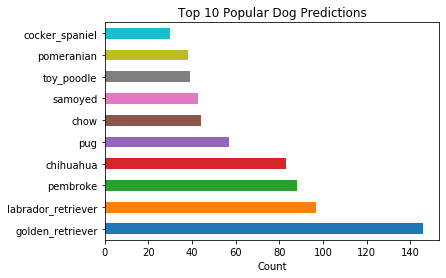

In [814]:
df_twitter.prediction.value_counts()[:10].plot(kind='barh', title='Top 10 Popular Dog Predictions')
plt.xlabel('Count')


Text(0.5, 0, 'Count')

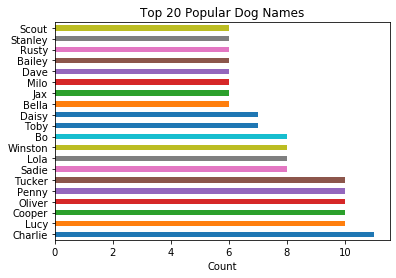

In [820]:
df_twitter.name.value_counts()[:20].plot(kind='barh', title='Top 20 Popular Dog Names')
plt.xlabel('Count')

Text(0.5, 0, 'Count')

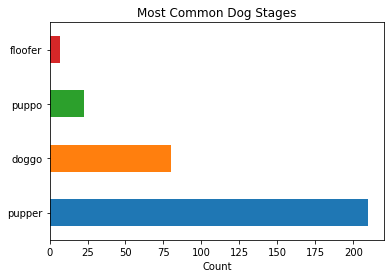

In [829]:
df_twitter.dog_stages.value_counts().plot(kind='barh', title='Most Common Dog Stages')
plt.xlabel('Count')

Text(0.5, 0, 'Count')

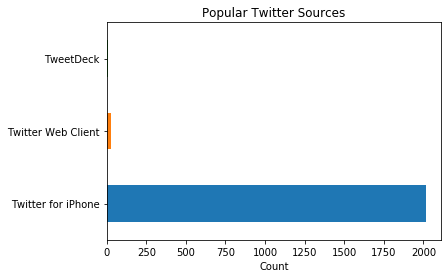

In [818]:
df_twitter.source.value_counts().plot(kind='barh', title='Popular Twitter Sources')
plt.xlabel('Count')

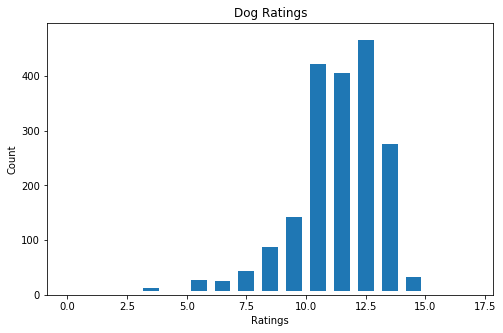

In [746]:
# Ratings
plt.figure(figsize = (8, 5))
plt.xlabel('Ratings')
plt.ylabel('Count')
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
plt.hist(x = df_twitter.rating_numerator, 
         edgecolor='white', linewidth=8, bins = bins)
plt.title('Dog Ratings');

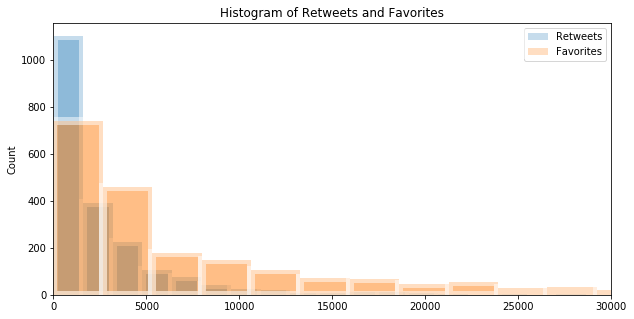

In [770]:
# Retweets
plt.figure(figsize = (10, 5))
plt.ylabel('Count')
plt.xlim(0, 30000)
plt.hist(x = df_twitter.retweet_count, edgecolor='white', label="Retweets", linewidth=8, bins = 50, alpha=.5,)
plt.hist(x = df_twitter.favorite_count, edgecolor='white', label="Favorites", linewidth=8, bins = 50, alpha=.5,)
plt.title('Histogram of Retweets and Favorites')
plt.legend();

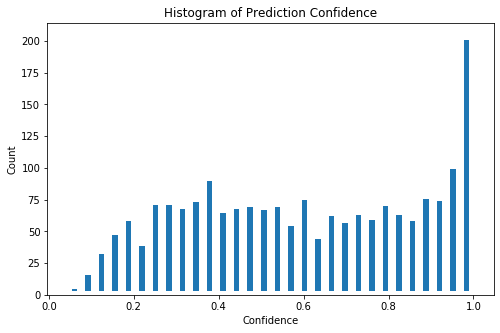

In [825]:
# Predictions
plt.figure(figsize = (8, 5))
plt.xlabel('Confidence')
plt.ylabel('Count')
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
plt.hist(x = df_twitter.confidence, 
         edgecolor='white', linewidth=8, bins = 30)
plt.title('Histogram of Prediction Confidence');